## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [230]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df=pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [231]:
#2 Check the shape of the DataFrame (rows, columns)
df.shape


(545, 13)

In [232]:
#3 Look at the data types of the columns
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [233]:
#4 Check for missing  values if any, replace with appropriate values
df.isnull().any()

price               False
area                False
bedrooms            False
bathrooms           False
stories             False
mainroad            False
guestroom           False
basement            False
hotwaterheating     False
airconditioning     False
parking             False
prefarea            False
furnishingstatus    False
dtype: bool

In [234]:
#5 Prepare  X (independent variables) and y (dependent variable)
y=df['price'] #-> target label
x=df.drop(columns=['price']) #x -> input feature

print("input features are:\n",x.columns.tolist())

input features are:
 ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


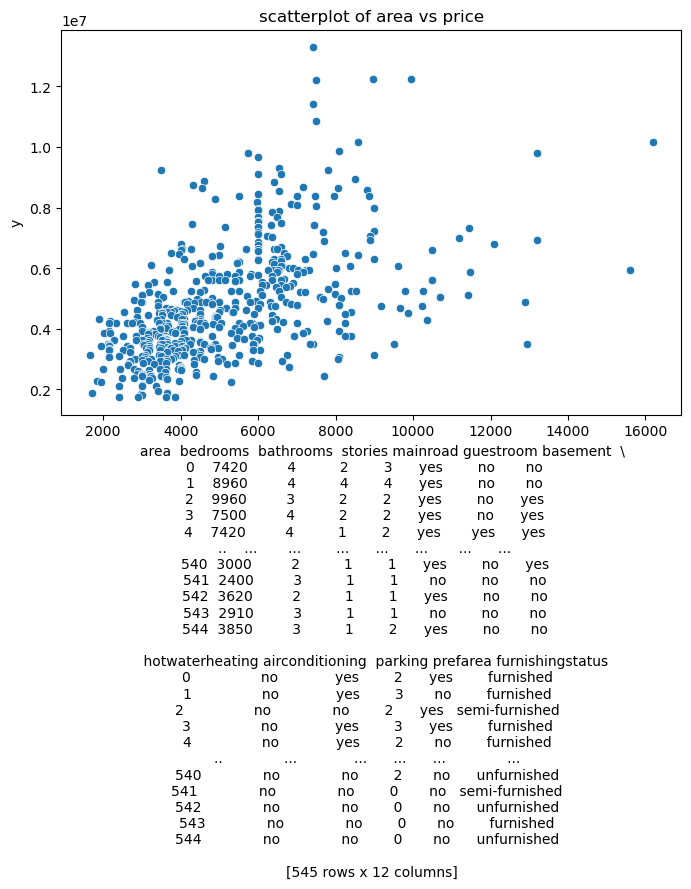

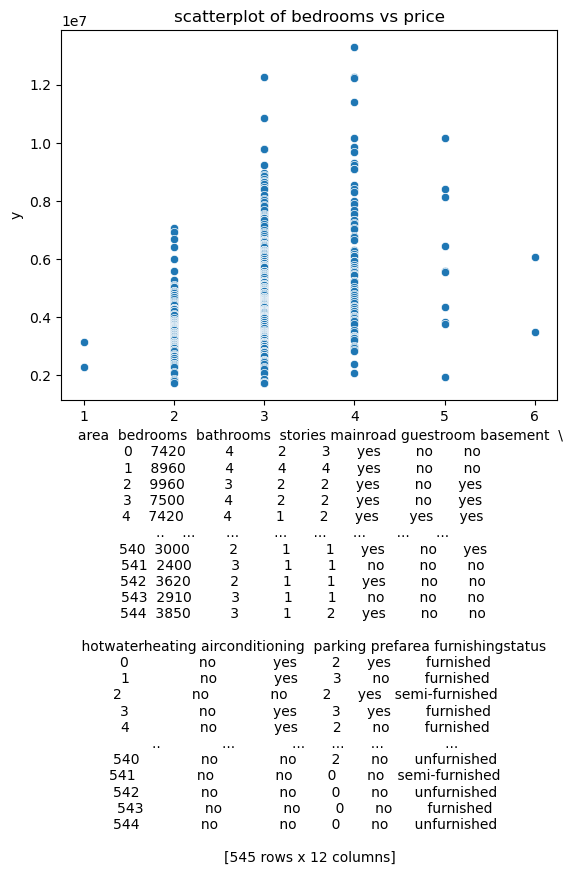

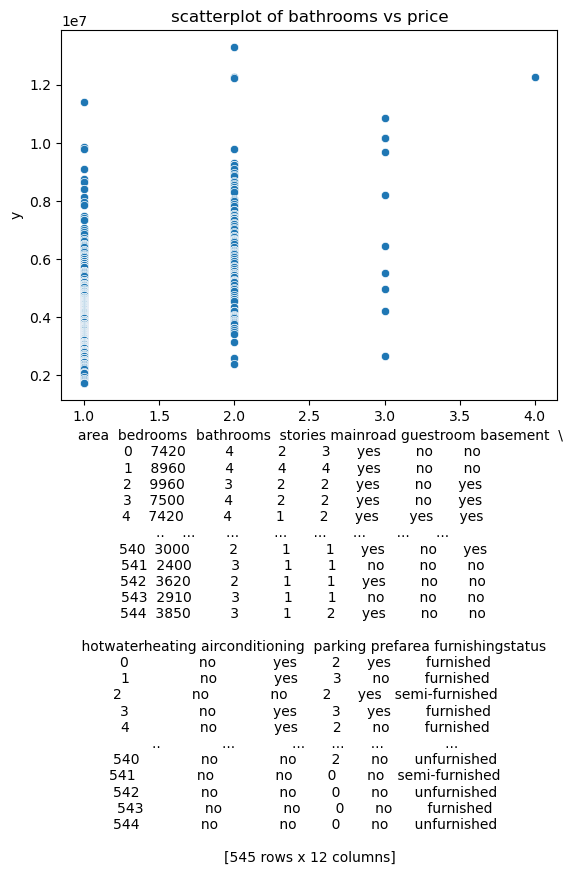

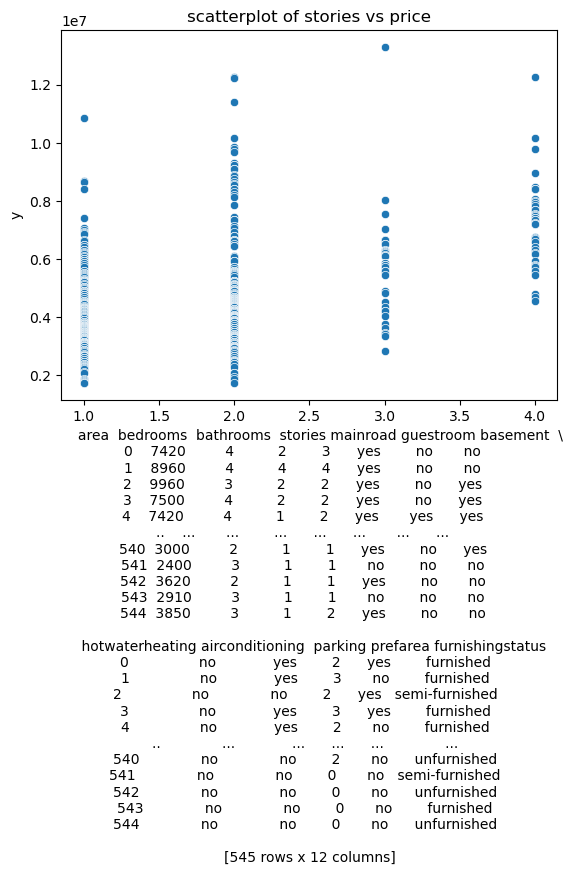

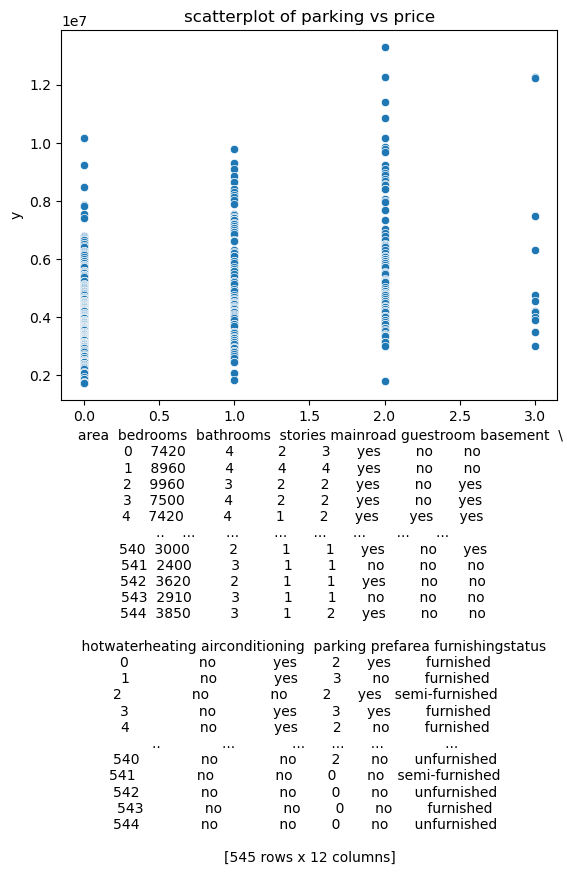

In [207]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
import seaborn as sns
import matplotlib.pyplot as plt
y=df['price']
x=df.drop(columns=['price'])
columns=x.select_dtypes(include=['int64']).columns
plt.figure(figsize=(8,5))
for i in columns:
    sns.scatterplot(x=x[i],y=y)
    plt.xlabel(x)
    plt.ylabel("y")
    plt.title(f"scatterplot of {i} vs price")
    plt.show()


In [208]:
#printing catergorical and numerical values
numerical_col=df.select_dtypes(include=['number','int64']).columns
categorical_col=df.select_dtypes(include=['object','category']).columns
print("numeric cols are :",numerical_col)
print("categorical cols :",categorical_col)

numeric cols are : Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')
categorical cols : Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [209]:
#7 Encoding categorical data in X
#converting categorical data into numerical to perfom plotings model fit
#1.applying label encoding for ordinal data (yes/no)
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
columns=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
for i in columns:
    df[i]=encoder.fit_transform(df[i])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [210]:
#8  Avoiding the Dummy Variable Trap
 #2.applying onehot encoding for nominal data
df.columns=df.columns.str.strip()
df.columns=df.columns.str.lower()
df1=pd.get_dummies(df,columns=['furnishingstatus']).replace({True:1,False:0})
df1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


In [211]:
#confirmation of encoding done successfuly or not
numeric=df.select_dtypes(include=['category','object']).columns
numeric                
df1.info()
df1.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   mainroad                         545 non-null    int64
 6   guestroom                        545 non-null    int64
 7   basement                         545 non-null    int64
 8   hotwaterheating                  545 non-null    int64
 9   airconditioning                  545 non-null    int64
 10  parking                          545 non-null    int64
 11  prefarea                         545 non-null    int64
 12  furnishingstatus_furnished       545 non-null    i

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [213]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split
#assinging x and y variables
x = t.drop(columns=['price'])
y = t['price']  # Assuming 'price' is the dependent variable 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

x_train.dtypes

area                               int64
bedrooms                           int64
bathrooms                          int64
stories                            int64
mainroad                           int64
guestroom                          int64
basement                           int64
hotwaterheating                    int64
airconditioning                    int64
parking                            int64
prefarea                           int64
furnishingstatus_furnished         int64
furnishingstatus_semi-furnished    int64
furnishingstatus_unfurnished       int64
dtype: object

In [214]:
#11 Fitting Multiple Linear Regression to the Training
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train,y_train)
print("intercept is:",model.intercept_)
print("coeficient is: ", model.coef_)



intercept is: -75163.73881652392
coeficient is:  [ 2.53287252e+02  8.08931413e+04  1.11475118e+06  4.17267580e+05
  4.08073682e+05  2.75710533e+05  4.82603522e+05  6.16375423e+05
  6.85839346e+05  3.03111236e+05  5.09192089e+05  1.70947968e+05
  4.92953049e+04 -2.20243273e+05]


In [215]:
#9 Apply feature scaling on numerical variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric=df.select_dtypes(include=['int64','number']).columns
df[numeric]= scaler.fit_transform(df[numeric])
print("successfully applied scaling and converted into csv file")
df.to_csv("housing_scaled.csv")

successfully applied scaling and converted into csv file


In [217]:
#12 Predict on the train set and calculate the error = y_pred - y_train
y_predict_train=model.predict(x_train)
errors_train = y_predict_train - y_train
print(errors_train)

126   -5.810803e+05
363   -1.098328e+05
370    8.121415e+05
31    -1.926221e+06
113    2.301975e+05
           ...     
71    -2.146252e+05
106    2.505982e+05
270    1.947122e+06
435   -4.602478e+05
102    9.861984e+05
Name: price, Length: 381, dtype: float64


AttributeError: module 'matplotlib.pyplot' has no attribute 'label'

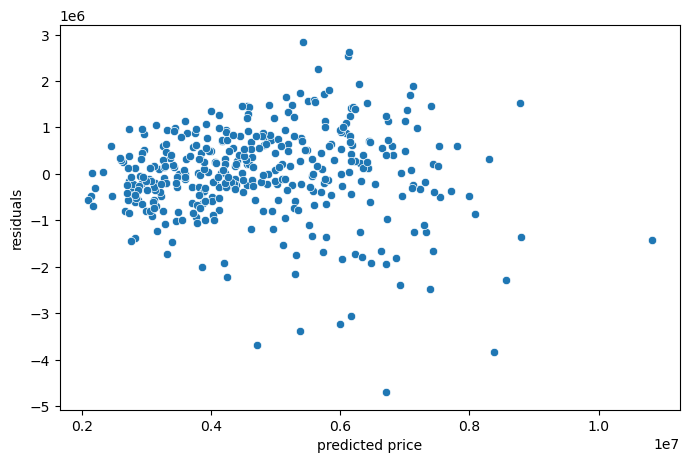

In [222]:
#13  Residual plot - plot y_pred in x axis and errors in y axis
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_predict_train, y=errors_train)
plt.xlabel("predicted price")
plt.ylabel("residuals")
plt.title("residual plot-training set")
plt.show()

In [1]:
#14  Predic on the test set
y_predict_test=model.predict(x_test)
errors_test = y_predict_test- y_test

NameError: name 'model' is not defined

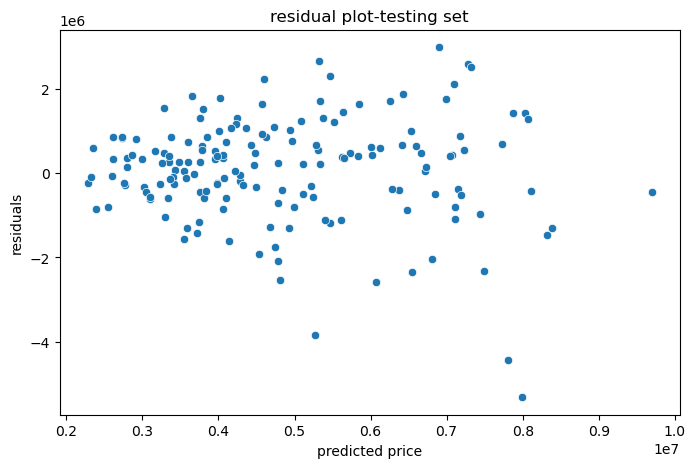

In [226]:
#15 Residual plot - plot y_pred in x axis and errors in y axis
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_predict_test, y=errors_test)
plt.xlabel("predicted price")
plt.ylabel("residuals")
plt.title("residual plot-testing set")
plt.show()

In [227]:
#16 Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error,r2_score
mse_train= mean_squared_error(y_train,y_predict_train)
mse_test= mean_squared_error(y_test,y_predict_test)
r2_train=r2_score(y_train,y_predict_train)
r2_test=r2_score(y_test,y_predict_test)

print("\nMean Squared Error - Train:", mse_train)
print("Mean Squared Error - Test:", mse_test)
print("R-Squared - Train:", r2_train)
print("R-Squared - Test:", r2_test)



Mean Squared Error - Train: 963835379828.3596
Mean Squared Error - Test: 1523019469501.2913
R-Squared - Train: 0.6931989807027313
R-Squared - Test: 0.6463350878895877


In [229]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)
n, p = x_train.shape  # Number of observations & features
adjusted_r2 = 1 - (1 - r2_test) * (n - 1) / (n - p - 1)
print("Adjusted R-Squared Value:", adjusted_r2)

Adjusted R-Squared Value: 0.6328069218525774
